<h1> <center> DiffraPy - Heterogeneous Velocity Model Example </h1> </center>

******************

Guilherme Zakarewicz¹, Susanne Maciel¹

¹University of Brasília (UnB)

2023

******************

This is an interactive Jupyter Notebook with an example of a heterogeneous velocity model. Here, we show how to use the main functions of ``DiffraPy``.

### Table of contents <a class='anchor' id='top'></a>

- [1 - Creating the model](#chapter1)
- [2 - Traveltime table](#chapter2)
- [3 - Wavelet](#chapter3)
- [4 - Forward modeling synthetic seismic gathers](#chapter4)
- [5 - Calculating the reflector dip field](#chapter5)
- [6 - Migration](#chapter6)

### Importing libs and modules

The main libraries ([numpy](https://numpy.org/), [scipy](https://scipy.org/), [matpotlib](https://matplotlib.org/), [importlib](https://docs.python.org/3/library/importlib.html)) can be easily installed with <b> pip</b>.

In [1]:
import importlib
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from tqdm import tqdm

import Diffrapy as df

In [2]:
importlib.reload(df)

<module 'Diffrapy' from 'C:\\Users\\guilh\\Desktop\\Code\\SeismicDiffractions\\Diffrapy.py'>

## 1 - Creating the model <a class="anchor" id="chapter1"></a>

Importing the velocity model file ``velvector`` and defining the main parameters. The velocity model is obtained from a portion of the SEG/EAGE salt model.

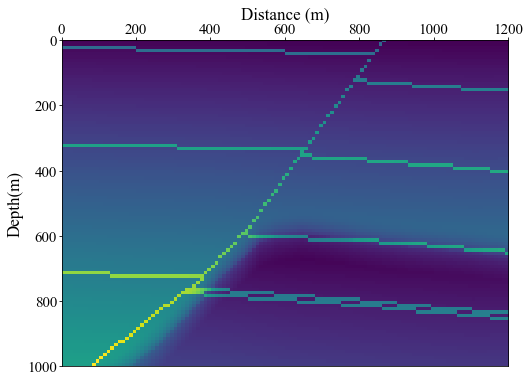

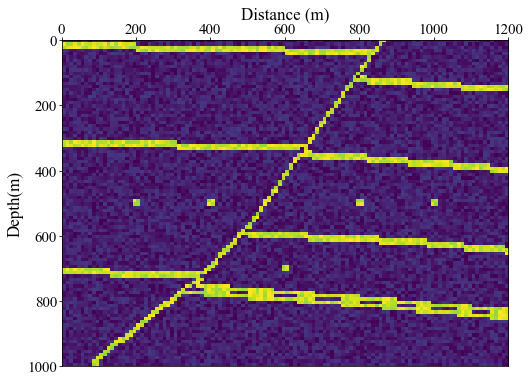

In [3]:
fr=40
nps=200
dt=.005 
rick=df.ricker(nps,fr,dt)

sx=10  #index position
sz=0  #index position
nx=120
ntr=120
nz=100
dt=.005
dx=10  #meters
dz=10  #meters
c=1992 #velocity m/s

tmax = np.sqrt((dx*nx)**2+(dz*nz)**2)*2/c
nt=int(np.ceil(tmax/dt+1))

nd2=nt+1; 
W=np.zeros(2*nt);
W[nt:nt+nps-1]=rick[0:nps-1];
x=np.arange(0,nx)
z=np.arange(0,nz)

velvector1 = np.loadtxt("Data/velvector") # Modelo de velocidade - 1 coluna em ASCII
vel = np.reshape(velvector1,[201,501]) # Coloca na dimensão correta
vel1 = vel[40:140,240:360] # Recorta um pequeno pedaço do modelovel[40:140,250:360]

c=vel1.min()
tmax = np.sqrt((dx*nx)**2+(dz*nz)**2)*2/c
nt=int(np.ceil(tmax/dt+1))

nd2=nt+1; 
W=np.zeros(2*nt);
W[nt:nt+nps-1]=rick[0:nps-1];

df.plot(vel1,"velocity_model",nx,dx,nz,dz,"Distance (m)","Depth(m)")

dvel1=(np.abs(np.diff(vel1,axis=0)));
mx=np.max(dvel1.flatten('F')) # Compute Refl Model for vel1;
dvel1=dvel1/mx;
dvel1=np.round(dvel1);
dvv=dvel1[nz-2,:]
R=np.append(dvel1,dvv[np.newaxis],axis=0) # We lost a row in R by diff() so we add it back again

#Adding diff points
R[50-1:50+1,20-1:20+1] = 1 
R[50-1:50+1,40-1:40+1] = 1 
R[50-1:50+1,80-1:80+1] = 1 
R[50-1:50+1,100-1:100+1] = 1 
R[70-1:70+1,60-1:60+1] = 1 

#Adding noise
nn = np.random.rand(nz,nx)
R = R+(nn-0.5)*0.2

df.plot(R,"reflectivity_model",nx,dx,nz,dz,"Distance (m)","Depth(m)")

For simplicity, we define a vagarosity model (SW = 1/c)

In [4]:
SW = 1./vel1 

***********

## 2 - Traveltime table <a class="anchor" id="chapter2"></a>

Creating the traveltime table based on the velocity model. We can save it as a binary file and open it later.

In [5]:
#After generating the traveltime table, you can comment the following command

#TT = df.raymodel3(SW,dx,ntr,"Data/CSG/raiosVelvector2.npy")

In [5]:
import time
start_time = time.time()

#TT = df.raymodel3(SW,dx,ntr,"Data/CSG/APAGAR_raiosVelvector2.npy")

end_time = time.time()

elapsed_time = end_time - start_time

# Print the result
print(f"Elapsed time: {elapsed_time} seconds")

100%|████████████████████████████████████████████████████████████████████████████████| 120/120 [10:03<00:00,  5.03s/it]

Elapsed time: 603.3717772960663 seconds


In [6]:
with open("Data/CSG/raiosVelvector2.npy", 'rb') as f:
    TTh = np.load(f)
    
timer=np.round(TTh/dt)+1

***********

## 3 - Wavelet <a class="anchor" id="chapter3"></a>

Creating a Ricker wavelet for generating the synthetic seismic data

In [7]:
fr=40 #Hz
nps=200
dt=.004 #s
rick=df.ricker(nps,fr,dt)
tmax = np.sqrt((dx*nx)**2+(dz*nz)**2)*2/c
nt=int(np.ceil(tmax/dt+1))
W=np.zeros(2*nt);
W[nt:nt+nps-1]=rick[0:nps-1]

***********

## 4 - Forward modeling synthetic seismic gathers <a class="anchor" id="chapter4"></a>

In [8]:
#Creating the synthetic csg

dsx = 5 #Shots spacing in index
nsx = nx
ngx = nx

#files = df.kirchhoffModeling(nsx,ngx,dsx,nx,nt,dt,TTh,R,W,"Data/CSG/Diff_velvector2")

In [9]:
###########3
import time
start_time = time.time()

#files = df.kirchhoffModeling(nsx,ngx,dsx,nx,nt,dt,TTh,R,W,"Data/CSG/Diff_velvector2")

end_time = time.time()

elapsed_time = end_time - start_time

# Print the result
print(f"Elapsed time: {elapsed_time} seconds")

############

100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [04:11<00:00, 10.47s/it]

Elapsed time: 251.5126030445099 seconds


We store the gathers in the ``files`` np.ndarray

In [9]:
files = []

for i in range(0,nsx,dsx):
    filename = "Data/CSG/Diff_velvector2_{}".format(i)
    with open(filename, 'rb') as file:
        (gather) = np.load(file)
        files.append(gather)

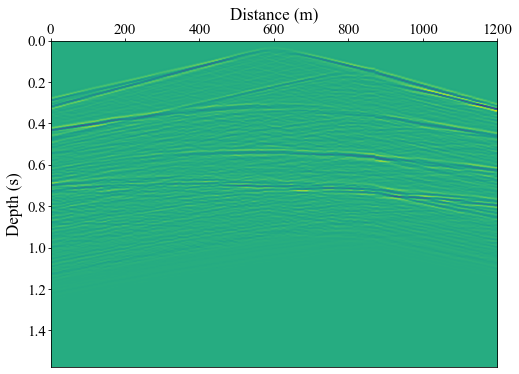

In [12]:
df.plot(files[12],"shot_75_het",nx,dx,nt,dt,"Distance (m)","Depth (s)")

***********

## 5 - Calculating the reflector dip field <a class="anchor" id="chapter5"></a>

In [13]:
pmin = -2
pmax = 2
dp = 0.1
xwin=zwin = 30
x_ini=z_ini = 0

###########3
import time
start_time = time.time()

pm,sm = df.local_window(R,xwin,zwin,x_ini,z_ini,dx,dz,pmin,pmax,dp) 

end_time = time.time()

elapsed_time = end_time - start_time

# Print the result
print(f"Elapsed time: {elapsed_time} seconds")

############

with open("Data/CSG/Diff_velvector2_dipfield", "wb") as f: 
    np.save(f, pm)
    
with open("Data/CSG/Diff_velvector2_semblance", "wb") as f: 
    np.save(f, sm)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:05<00:00,  1.52it/s]

Elapsed time: 65.80011129379272 seconds


In [10]:
pmin = -2
pmax = 2
dp = 0.1
xwin=zwin = 30
x_ini=z_ini = 0

#pm,sm = df.local_window(R,xwin,zwin,x_ini,z_ini,dx,dz,pmin,pmax,dp) 
#
#with open("Data/CSG/Diff_velvector2_dipfield", "wb") as f: 
#    np.save(f, pm)
#    
#with open("Data/CSG/Diff_velvector2_semblance", "wb") as f: 
#    np.save(f, sm)

with open("Data/CSG/Diff_velvector2_dipfield", "rb") as f:
    pm = np.load(f)

with open("Data/CSG/Diff_velvector2_semblance", "rb") as f:
    sm = np.load(f)

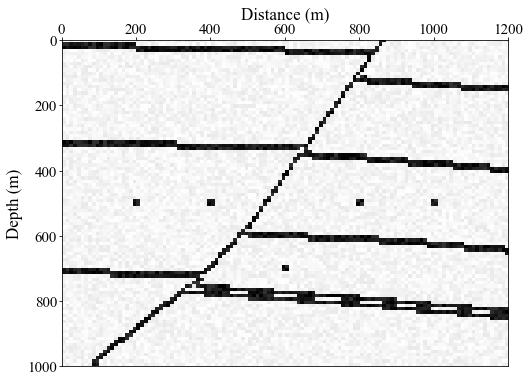

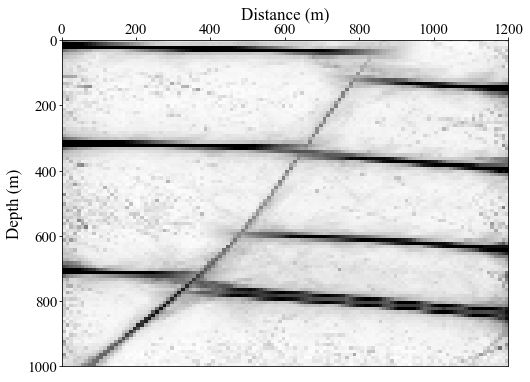

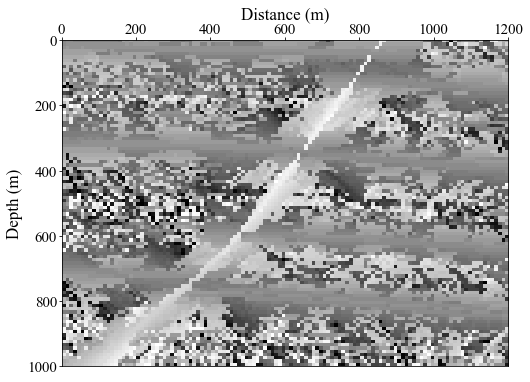

In [15]:
df.plot(R,"het_R",nx,dx,nz,dz,"Distance (m)","Depth (m)",cmp="Greys")
df.plot(sm,"het_sm",nx,dx,nz,dz,"Distance (m)","Depth (m)",cmp="Greys")
df.plot(pm,"het_pm",nx,dx,nz,dz,"Distance (m)","Depth (m)",cmp="Greys")

After we calculated the dip field, it is possible to generate both the horizontal and vertical components of the reflectors normal

In [11]:
m_theta = np.arctan(pm)

X = np.sin(m_theta)
Y = np.cos(m_theta)

***********

## 6 - Migration <a class="anchor" id="chapter6"></a>

Migration's parameters

In [12]:
shot = 60

file_original = 'Data/CSG/Diff_velvector2_{}'.format(int(shot))

with open(file_original, 'rb') as file:
    gather1t = np.load(file)

gather1=gather1t[0:nt,:]
isx=shot

dwin=dt
win=10*dt #Time Window
app_ref=20 #Aperture for conventional migration
app_dif=50 #Aperture for diffraction migration

Migrating only one synthetic csg for tunning parameters 

100%|████████████████████████████████████████████████████████████████████████████████| 120/120 [00:07<00:00, 16.59it/s]


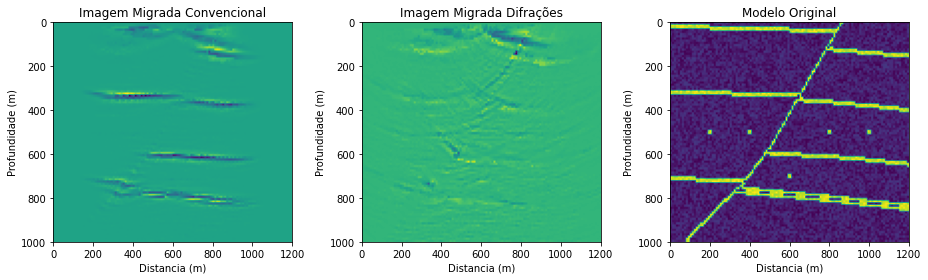

In [15]:
refl,diff = df.kirchhoffMigration(gather1,isx,dx,dz,dt,win,dwin,app_ref,app_dif,TTh,X,Y,sm)

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(13,4))

ax1.imshow(refl, aspect="auto",extent=[0,dx*nx,dz*nz,0])
ax1.set_title("Imagem Migrada Convencional")
ax1.set_xlabel("Distancia (m)")
ax1.set_ylabel("Profundidade (m)")

ax2.imshow(diff, aspect="auto",extent=[0,dx*nx,dz*nz,0])
ax2.set_title("Imagem Migrada Difrações")
ax2.set_xlabel("Distancia (m)")
ax2.set_ylabel("Profundidade (m)")

ax3.imshow(R, aspect="auto",extent=[0,dx*nx,dz*nz,0])
ax3.set_title("Modelo Original")
ax3.set_xlabel("Distancia (m)")
ax3.set_ylabel("Profundidade (m)")

plt.tight_layout()
plt.show()

In [18]:
start_time = time.time()

refl,diff = df.kirchhoffMigration(gather1,isx,dx,dz,dt,win,dwin,app_ref,app_dif,TTh,X,Y,sm)

end_time = time.time()

elapsed_time = end_time - start_time

# Print the result
print(f"Elapsed time: {elapsed_time} seconds")

100%|████████████████████████████████████████████████████████████████████████████████| 120/120 [00:09<00:00, 12.37it/s]

Elapsed time: 9.77848196029663 seconds


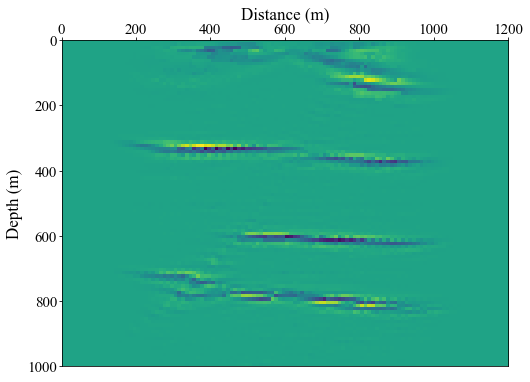

In [16]:
df.plot(refl,"mig1_refl",nx,dx,nz,dz,"Distance (m)","Depth (m)")

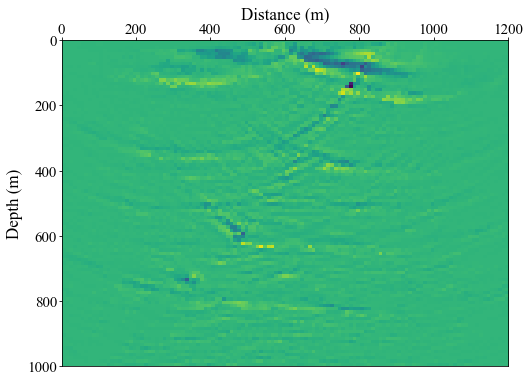

In [17]:
df.plot(diff,"mig1_diff",nx,dx,nz,dz,"Distance (m)","Depth (m)")

Migrating all the synthetic csg

24it [02:14,  5.60s/it]


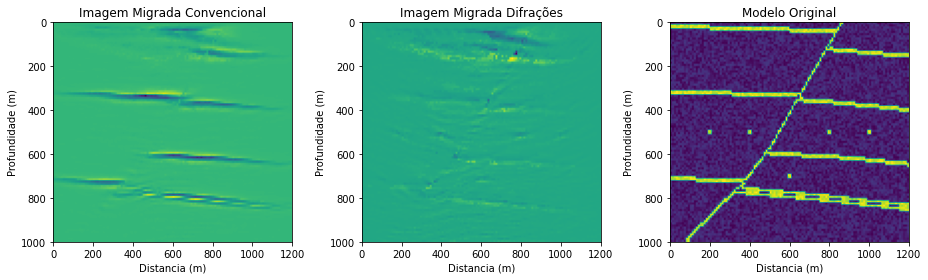

In [15]:
refls,diffs = df.kirchhoffMigration(files,isx,dx,dz,dt,win,dwin,app_ref,app_dif,TTh,X,Y,sm)

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(13,4))

ax1.imshow(refls, aspect="auto",extent=[0,dx*nx,dz*nz,0])
ax1.set_title("Imagem Migrada Convencional")
ax1.set_xlabel("Distancia (m)")
ax1.set_ylabel("Profundidade (m)")

ax2.imshow(diffs, aspect="auto",extent=[0,dx*nx,dz*nz,0])
ax2.set_title("Imagem Migrada Difrações")
ax2.set_xlabel("Distancia (m)")
ax2.set_ylabel("Profundidade (m)")

ax3.imshow(R, aspect="auto",extent=[0,dx*nx,dz*nz,0])
ax3.set_title("Modelo Original")
ax3.set_xlabel("Distancia (m)")
ax3.set_ylabel("Profundidade (m)")

plt.tight_layout()
plt.show()

In [14]:
#start_time = time.time()

refls,diffs = df.kirchhoffMigration(files,isx,dx,dz,dt,win,dwin,app_ref,app_dif,TTh,X,Y,sm)

#end_time = time.time()

#elapsed_time = end_time - start_time

# Print the result
#print(f"Elapsed time: {elapsed_time} seconds")

24it [03:38,  9.09s/it]


In [28]:
np.shape(diffs)

(100, 120)

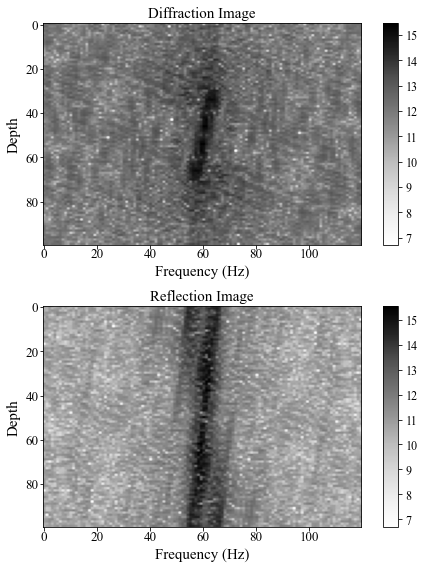

In [64]:
fft_result = np.fft.fft2(refls)

# Shift zero frequency components to the center
fft_result_shifted = np.fft.fftshift(fft_result)

# Compute the magnitude spectrum (absolute values of the complex numbers)
magnitude_spectrum = np.abs(fft_result_shifted)

fft_result1 = np.fft.fft2(diffs)

# Shift zero frequency components to the center
fft_result_shifted1 = np.fft.fftshift(fft_result1)

# Compute the magnitude spectrum (absolute values of the complex numbers)
magnitude_spectrum1 = np.abs(fft_result_shifted1)

# Display the spectrogram

fft_result = np.fft.fft2(refls)

# Shift zero frequency components to the center
fft_result_shifted = np.fft.fftshift(fft_result)

# Compute the magnitude spectrum (absolute values of the complex numbers)
magnitude_spectrum = np.abs(fft_result_shifted)

csfont = {'fontname':'Times New Roman'}


fig, (ax1,ax2) = plt.subplots(2,1,figsize=(6,8))

im1 = ax1.imshow(np.log1p(magnitude_spectrum1), cmap='Greys', aspect='auto')

ax1.set_title('Diffraction Image', **csfont, fontsize=15)
ax1.set_xlabel('Frequency (Hz)', **csfont, fontsize=15)
ax1.set_ylabel('Depth', **csfont, fontsize=15)
ax1.tick_params(axis='x', which='major', pad=0, labelsize=13)
ax1.tick_params(axis='y', which='major', pad=1, labelsize=13)

for tick in ax1.get_xticklabels():
    tick.set_fontname("Times New Roman")
for tick in ax1.get_yticklabels():
    tick.set_fontname("Times New Roman")

divider1 = make_axes_locatable(ax1)

cax1 = divider1.append_axes("right", size="5%", pad=0.3)
cbar1 = plt.colorbar(im1, cax=cax1)
cbar1.ax.tick_params(labelsize=12)
for l in cbar1.ax.yaxis.get_ticklabels():
    l.set_family("Times New Roman")

#ax1.set_colorbar(label='Log Magnitude')


# Display the spectrogram

im2 = ax2.imshow(np.log1p(magnitude_spectrum), cmap='Greys', aspect='auto')

ax2.set_title('Reflection Image', **csfont, fontsize=15)
ax2.set_xlabel('Frequency (Hz)', **csfont, fontsize=15)
ax2.set_ylabel('Depth', **csfont, fontsize=15)
ax2.tick_params(axis='x', which='major', pad=0, labelsize=13)
ax2.tick_params(axis='y', which='major', pad=1, labelsize=13)

for tick in ax2.get_xticklabels():
    tick.set_fontname("Times New Roman")
for tick in ax2.get_yticklabels():
    tick.set_fontname("Times New Roman")

divider2 = make_axes_locatable(ax2)

cax2 = divider2.append_axes("right", size="5%", pad=0.3)
cbar2 = plt.colorbar(im2, cax=cax2)
cbar2.ax.tick_params(labelsize=12)
for l in cbar2.ax.yaxis.get_ticklabels():
    l.set_family("Times New Roman")

plt.savefig("Data/Spectrogram.png",dpi=300)
plt.tight_layout()
plt.show()

In [34]:
np.shape(diffs)

(100, 120)

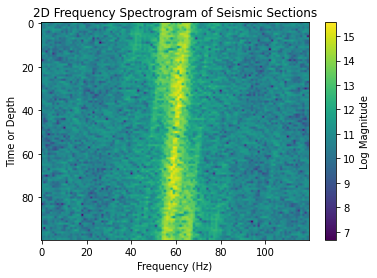

In [20]:
fft_result = np.fft.fft2(refls)

# Shift zero frequency components to the center
fft_result_shifted = np.fft.fftshift(fft_result)

# Compute the magnitude spectrum (absolute values of the complex numbers)
magnitude_spectrum = np.abs(fft_result_shifted)

# Display the spectrogram
plt.imshow(np.log1p(magnitude_spectrum), cmap='viridis', aspect='auto')
plt.colorbar(label='Log Magnitude')
plt.title('2D Frequency Spectrogram of Seismic Sections')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Time or Depth')
plt.show()

In [ ]:
filename = "Data/SEGY_files/diffs_heter.sgy"
st = _read_segy(filename)
st.write("Data/SEGY_files/sudiffs_heter.su")

filename = "Data/SEGY_files/refls_heter.sgy"
st = _read_segy(filename)
st.write("Data/SEGY_files/surefls_heter.su")

In [16]:
################## APAGAR!! ##############

from obspy import read, Trace, Stream, UTCDateTime
from obspy.core import AttribDict
from obspy.io.segy.segy import SEGYTraceHeader, SEGYBinaryFileHeader
from obspy.io.segy.core import _read_segy
import numpy as np
import sys
import matplotlib.pyplot as plt

ntr = np.shape(diffs)[1]
stream = Stream()
offset = 0

for i in range(ntr):
    trace_i = diffs[:,i] #looping through each vertical trace of a gather shot
    trace_i = np.require(trace_i, dtype=np.float32)
    trace = Trace(data=trace_i)
    trace.stats.delta = dt
    trace.stats.starttime = UTCDateTime(2023,1,1,1,1,1)
    trace.stats._format = "segy"
    trace.stats.distance = offset
    if not hasattr(trace.stats, "segy.trace_header"):
        trace.stats.segy = {}
    trace.stats.segy.trace_header = SEGYTraceHeader()
    stream.append(trace)
    offset = offset + dx

stream.write("Data/SEGY_files/diffs_heter.sgy", format="SEGY", data_encoding=1,byteorder=sys.byteorder)

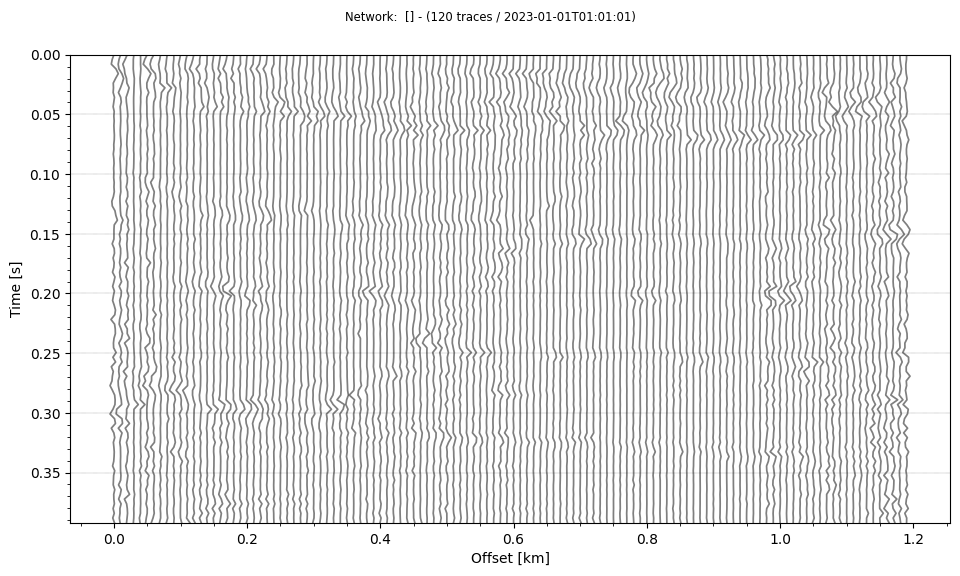

In [17]:
stream.plot(type='section',time_down=True,linewidth=1.25, grid_linewidth=.25,show=False)

In [18]:
ntr = np.shape(refls)[1]
stream = Stream()
offset = 0

for i in range(ntr):
    trace_i = refls[:,i] #looping through each vertical trace of a gather shot
    trace_i = np.require(trace_i, dtype=np.float32)
    trace = Trace(data=trace_i)
    trace.stats.delta = dt
    trace.stats.starttime = UTCDateTime(2023,1,1,1,1,1)
    trace.stats._format = "segy"
    trace.stats.distance = offset
    if not hasattr(trace.stats, "segy.trace_header"):
        trace.stats.segy = {}
    trace.stats.segy.trace_header = SEGYTraceHeader()
    stream.append(trace)
    offset = offset + dx

stream.write("Data/SEGY_files/refls_heter.sgy", format="SEGY", data_encoding=1,byteorder=sys.byteorder)

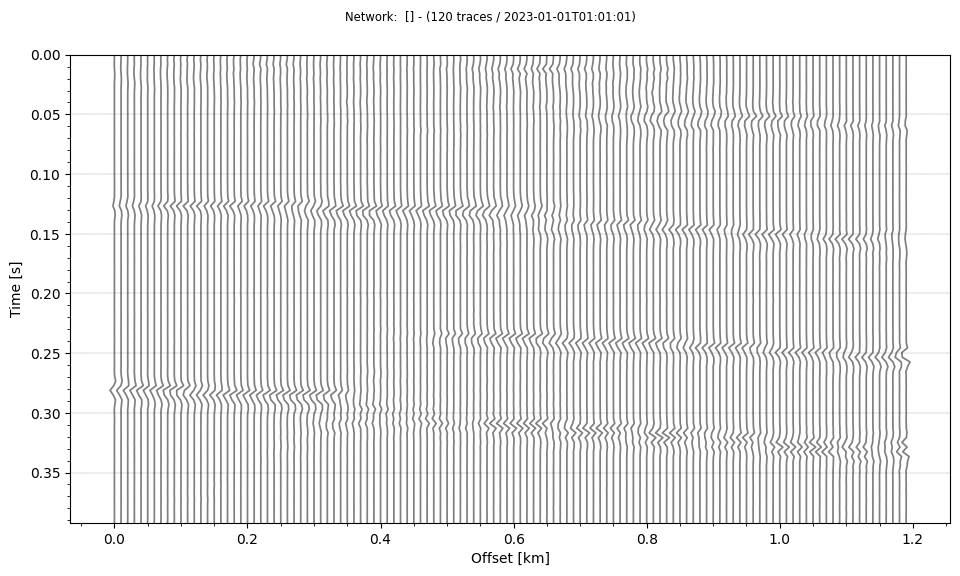

In [19]:
stream.plot(type='section',time_down=True,linewidth=1.25, grid_linewidth=.25,show=False)

In [16]:
tm_summ = diffs+refls

In [17]:
from obspy import read, Trace, Stream, UTCDateTime
from obspy.core import AttribDict
from obspy.io.segy.segy import SEGYTraceHeader, SEGYBinaryFileHeader
from obspy.io.segy.core import _read_segy
import numpy as np
import sys
import matplotlib.pyplot as plt

ntr = np.shape(tm_summ)[1]
stream = Stream()
offset = 0

for i in range(ntr):
    trace_i = tm_summ[:,i] #looping through each vertical trace of a gather shot
    trace_i = np.require(trace_i, dtype=np.float32)
    trace = Trace(data=trace_i)
    trace.stats.delta = dt
    trace.stats.starttime = UTCDateTime(2023,1,1,1,1,1)
    trace.stats._format = "segy"
    trace.stats.distance = offset
    if not hasattr(trace.stats, "segy.trace_header"):
        trace.stats.segy = {}
    trace.stats.segy.trace_header = SEGYTraceHeader()
    stream.append(trace)
    offset = offset + dx

stream.write("Data/SEGY_files/het_summ.sgy", format="SEGY", data_encoding=1,byteorder=sys.byteorder)
filename = "Data/SEGY_files/het_summ.sgy"
st = _read_segy(filename)
st.write("Data/SEGY_files/het_summ.su")

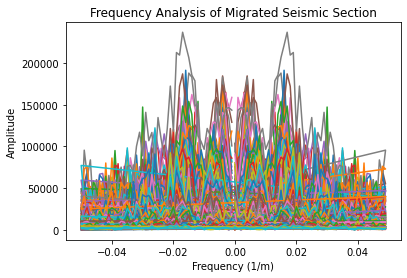

In [17]:
diff_fft = np.fft.fft(diffs, axis=0)

# Calculate the amplitude spectrum (absolute values of the FFT)
amplitude_spectrum = np.abs(diff_fft)

# Create a frequency axis in reciprocal depth (1/m)
depth_interval = 10  # Adjust this based on your depth data
depth_axis = np.fft.fftfreq(diffs.shape[0], d=depth_interval)

# Plot the amplitude spectrum
plt.plot(depth_axis, amplitude_spectrum)
plt.title('Frequency Analysis of Migrated Seismic Section')
plt.xlabel('Frequency (1/m)')
plt.ylabel('Amplitude')
plt.show()